### Mac 한글 폰트 지정

set([f.name for f in matplotlib.font_manager.fontManager.ttflist])

### 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# PUT Option 만기일 손익

In [2]:
def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

In [3]:
# Infosys stock price 
spot_price = 255.00      # KOSPI200 현재가

# Call strike price and cost
strike_price = 260.00    # put option 행사가
premium = 5              # 계약당 premium
contracts = 10           # 계약수
multiplier = 500000      # 거래승수

pnl = put_payoff(spot_price, strike_price, premium,contracts, multiplier)

print("{:,.0f} WON".format(pnl))

0 WON


# Define parameters

We will define the spot price(현물가격), the strike price, premium, and a range of possible values for the Infosys stock price at expiry.

In [4]:
# Infosys stock price
spot_price = 900

# Put strike price and cost
strike_price = 900
premium = 20

# Stock price range at the expiration of the put
# We have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price,1.1*spot_price)
put_long_payoff = put_payoff(sT, strike_price, premium)

# Put option buyer payoff (수익)

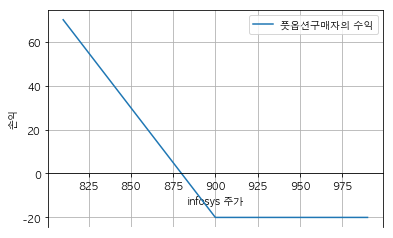

In [5]:
fig, ax = plt.subplots()
ax.spines["bottom"].set_position("zero")
plt.plot(sT, put_long_payoff, label="풋옵션구매자의 수익")
plt.grid(True)
plt.xlabel('infosys 주가')
plt.ylabel('손익')
plt.legend();

So what do you observe? 

1. Even if the price of Infosys goes above the strike price of 900, the maximum loss seems to be just ₹20/-. Therefore, the loss to the put option buyer is restricted to the extent of the premium he has paid.

2. The profit from this put option seems to increase linearly as and when Infosys starts to move below the strike price of 900. Therefore, the lower the spot price goes, the higher will be the profit.

3. Though the put option is supposed to make a profit when the spot price moves below the strike price, the put option buyer first needs to recover the premium he has paid.

From the above points we can say that the buyer of the put option has a limited risk and a potential to make an unlimited profit.

# Put option 판매자의 보상 (seller payoff)

To get the payoff graph for option seller, we have multiplied the payoff of option buyer by -1.0, as the option buyer makes profit, the option seller will lose the exact same amount and vice-versa.

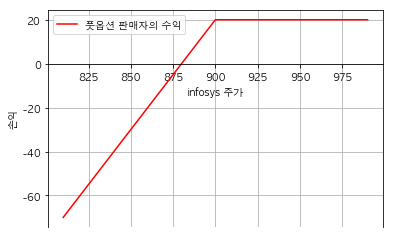

In [6]:
put_short_payoff = -1 * put_long_payoff

fig, ax = plt.subplots()
plt.plot(sT, put_short_payoff, label="풋옵션 판매자의 수익", color='r')
ax.spines['bottom'].set_position('zero')
plt.grid(True)
plt.legend()
plt.xlabel('infosys 주가')
plt.ylabel('손익');

The put option seller payoff looks like a mirror image of the put option buyer payoff. 

1. The profit is restricted to ₹20/- as long as the spot price is trading at any price above the strike price of 900.
2. From 900 to 880, we can see the profits getting reduced.
3. Below 880, the put option seller starts losing money. The losses increases with decrease in stock price.

Therefore, you sell a put option only when your view is that the underlying asset will not fall beyond the strike price

In [7]:
import numpy as np
import pandas as pd
# Tata motors stock price 
spot_price = 430 
# Stock price range at expiration of the call
sT = np.arange(0.98*spot_price,1.03*spot_price)
# Put
strike_price = 430 
premium = 3
# Type your code here
payoff_put = np.where(sT < strike_price, strike_price - sT, 0) 
payoff_put = payoff_put - premium
df = pd.DataFrame({'stock_price':sT, 'payoff_put':payoff_put})
df.head(20)

,stock_price,payoff_put
0,421.4,5.6
1,422.4,4.6
2,423.4,3.6
3,424.4,2.6
4,425.4,1.6
5,426.4,0.6
6,427.4,-0.4
7,428.4,-1.4
8,429.4,-2.4
9,430.4,-3.0


# Call payoff

# Call Option 만기일 손익

In [8]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    price = sT - strike_price
    pnl = np.where(sT > strike_price, price, 0) - premium
    return pnl * contracts * multiplier

In [17]:
# Infosys stock price 
spot_price = 258.80      # KOSPI200 현재가

# Call strike price and cost
strike_price = 260.00    # call option 행사가
premium = 5              # 계약당 premium
contracts = 10           # 계약수
multiplier = 500000      # 거래승수

pnl = call_payoff(spot_price, strike_price, premium,contracts, multiplier)

print("{:,.0f} WON".format(pnl))

-25,000,000 WON


In [18]:
# Infosys stock price 
spot_price = 900 # 주식 현재가

# Call strike price and cost
strike_price = 900 # 행사가
premium = 20       # 계약당 premium

# Stock price range at the expiration of the call
# We have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price,1.1*spot_price) 

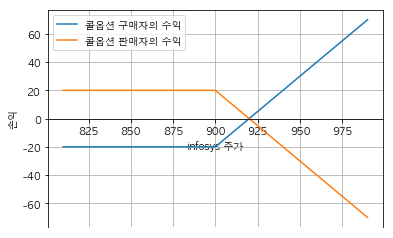

In [11]:
call_long_profit = call_payoff(sT, strike_price, premium)
call_short_profit = - call_long_profit

fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
plt.plot(sT, call_long_profit, label='콜옵션 구매자의 수익')
plt.plot(sT, call_short_profit, label='콜옵션 판매자의 수익')

plt.legend()
plt.grid(True)
plt.xlabel('infosys 주가')
plt.ylabel('손익');

# put-call parity

1) call option 매수 + put option 매도

    행사가 500, 만기 1 년, 프리미엄 100 인 call option 매수

    행사가 500, 만기 1 년, 프리미엄 100 인 put option 매도
    
* 유럽형 옵션에만 해당. 미국형은 만기까지 보유할 때 해당

In [12]:
strike_price = 500 
premium = 100
sT = np.arange(100,800) 

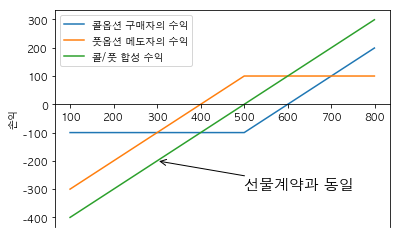

In [13]:
call_long_profit = call_payoff(sT, strike_price, premium)
put_short_profit = - put_payoff(sT, strike_price, premium)
total_profit = call_long_profit + put_short_profit
fig, ax = plt.subplots()
ax.spines['bottom'].set_position('zero')
plt.plot(sT, call_long_profit, label='콜옵션 구매자의 수익')
plt.plot(sT, put_short_profit, label='풋옵션 메도자의 수익')
plt.plot(sT, total_profit, label='콜/풋 합성 수익')
plt.annotate("선물계약과 동일", xy=(300,-200), xytext=(500,-300), fontsize=15,
             arrowprops={'arrowstyle': '->'})

plt.legend()
plt.ylabel('손익');

# Arbitrage 거래

1) portfolio A :

call option 매수 + zero coupon bond 매수

    행사가 500, 만기 1 년, call option 매수

    만기 1 년, 500(행사가와 동일 금액 수령) 채권 매수
    
2) portfolio B :

put option 매수 + underlying asset
    
    행사가 500, 만기 1 년, put option 매수

    underlying asset 500 매수
    
    
* 채권 중에는 제로쿠폰(zero coupon, zero coupon bond)이란 것이 있다. 즉, 이자가 전혀 없다는 것으로 무이자 채권이다. 제로쿠폰은 이자가 없지만 대신 발행할 때 미리 그 이자에 상당하는 금액을 할인해 준다. 5년 만기 20% 할인율의 100만원 짜리 제로쿠폰이 있다고 하면, 이것을 살 때는 80만원만 지급하면 되고 5년이 지난 뒤에 이 채권을 제시하면 100만원을 받게 된다.

In [14]:
strike_price = 500 
premium = 0
sT = np.arange(0,1000) 

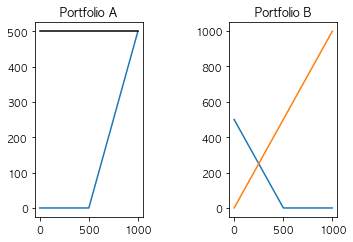

In [15]:
call_long_profit = call_payoff(sT, strike_price, premium)
put_long_profit = put_payoff(sT, strike_price, premium)
bond = 500
plt.subplot(121)
plt.plot(sT, call_long_profit)
plt.plot([0, 1000],[500, 500],'k-')
plt.title('Portfolio A')

plt.subplot(122)
plt.plot(sT, put_long_profit)
plt.plot(sT, sT);
plt.title('Portfolio B');

plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

| 행사가 | 만기주가 | Porfolio A | Portfolio B        
| :- |-------------: | :-: |
|500| 600 | 100+500 = 600 | 0 + 600
|500| 400 | 0 + 500 | 100 + 400 = 500

Portfolio A = $C + X\exp^{-rt}$

Portfolio B = P + $S_0$

C = Call price

P = Put price

X = 행사가

$S_0$ = initial price of underlying

r = interest rate

t = time to expiry

$e^{-rt}$ : 할인율